In [72]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from sklearn.matrics import confusion_matrix , classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [73]:
#read data from github link
data=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [74]:
data.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
894,7.2,0.63,0.03,2.2,0.080,17.0,88.0,0.99745,3.53,0.58,9.8,6
765,9.2,0.67,0.10,3.0,0.091,12.0,48.0,0.99888,3.31,0.54,9.5,6
511,10.0,0.59,0.31,2.2,0.090,26.0,62.0,0.99940,3.18,0.63,10.2,6
244,15.0,0.21,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
1385,8.0,0.81,0.25,3.4,0.076,34.0,85.0,0.99668,3.19,0.42,9.2,5
1224,12.6,0.39,0.49,2.5,0.080,8.0,20.0,0.99920,3.07,0.82,10.3,6
429,12.8,0.84,0.63,2.4,0.088,13.0,35.0,0.99970,3.10,0.60,10.4,6
1257,7.0,0.58,0.28,4.8,0.085,12.0,69.0,0.99633,3.32,0.70,11.0,6
472,12.5,0.37,0.55,2.6,0.083,25.0,68.0,0.99950,3.15,0.82,10.4,6
410,9.0,0.43,0.34,2.5,0.080,26.0,86.0,0.99870,3.38,0.62,9.5,6


In [75]:
#getting the shape of data
data.shape

(1599, 12)

##### 1599 rows × 12 columns data

In [76]:
#getting data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### OBSERVATIONS :

-->1599 rows × 12 columns,

-->No Null Values present in data,

-->'Quality' column is having 'int64' datatype,

-->remaining columns are having 'float64 ' datatype

-->the data seems to be continious in nature as all columns are 'float64' dtype

In [77]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null values in data

In [78]:
for column in data:
    count=data[column].value_counts()
    print(data[column],"  :  ", count)

0        7.4
1        7.8
2        7.8
3       11.2
4        7.4
        ... 
1594     6.2
1595     5.9
1596     6.3
1597     5.9
1598     6.0
Name: fixed acidity, Length: 1599, dtype: float64   :   7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64
0       0.700
1       0.880
2       0.760
3       0.280
4       0.700
        ...  
1594    0.600
1595    0.550
1596    0.510
1597    0.645
1598    0.310
Name: volatile acidity, Length: 1599, dtype: float64   :   0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64
0       0.00
1       0.00
2       0.04
3       0.56
4       0.00
        ... 
1594    0.08
1595    0.10
1596    0.13
1597    0.12
1598    0.47
Name: citric acid, Length: 1599, dtype: float64   :   0.00    132
0.49     68
0.24     51
0.02  

##### Confirming No Null Values in data

In [79]:
#getteing basic stats for the data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Quality column is our "Label" while other columns are features

mean and 50% of each column are almost equal, except for column "Total Sulferdioxide"

the difference between 75% and Max value seems to be on higher side, it look like data contains outliers on max side

the Label - Quality column is having descrete data, so its a multiclass classification problem

In [80]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

##### Value Counts in 'quality' clomuns are confirm to be descrete in nature, so this is muliclass classification problem.
##### Also, the counts for values - 3, 8, 4 are very less compared to 5, 6 and 7

## Lets now check the distrubution of data (EDA starts)

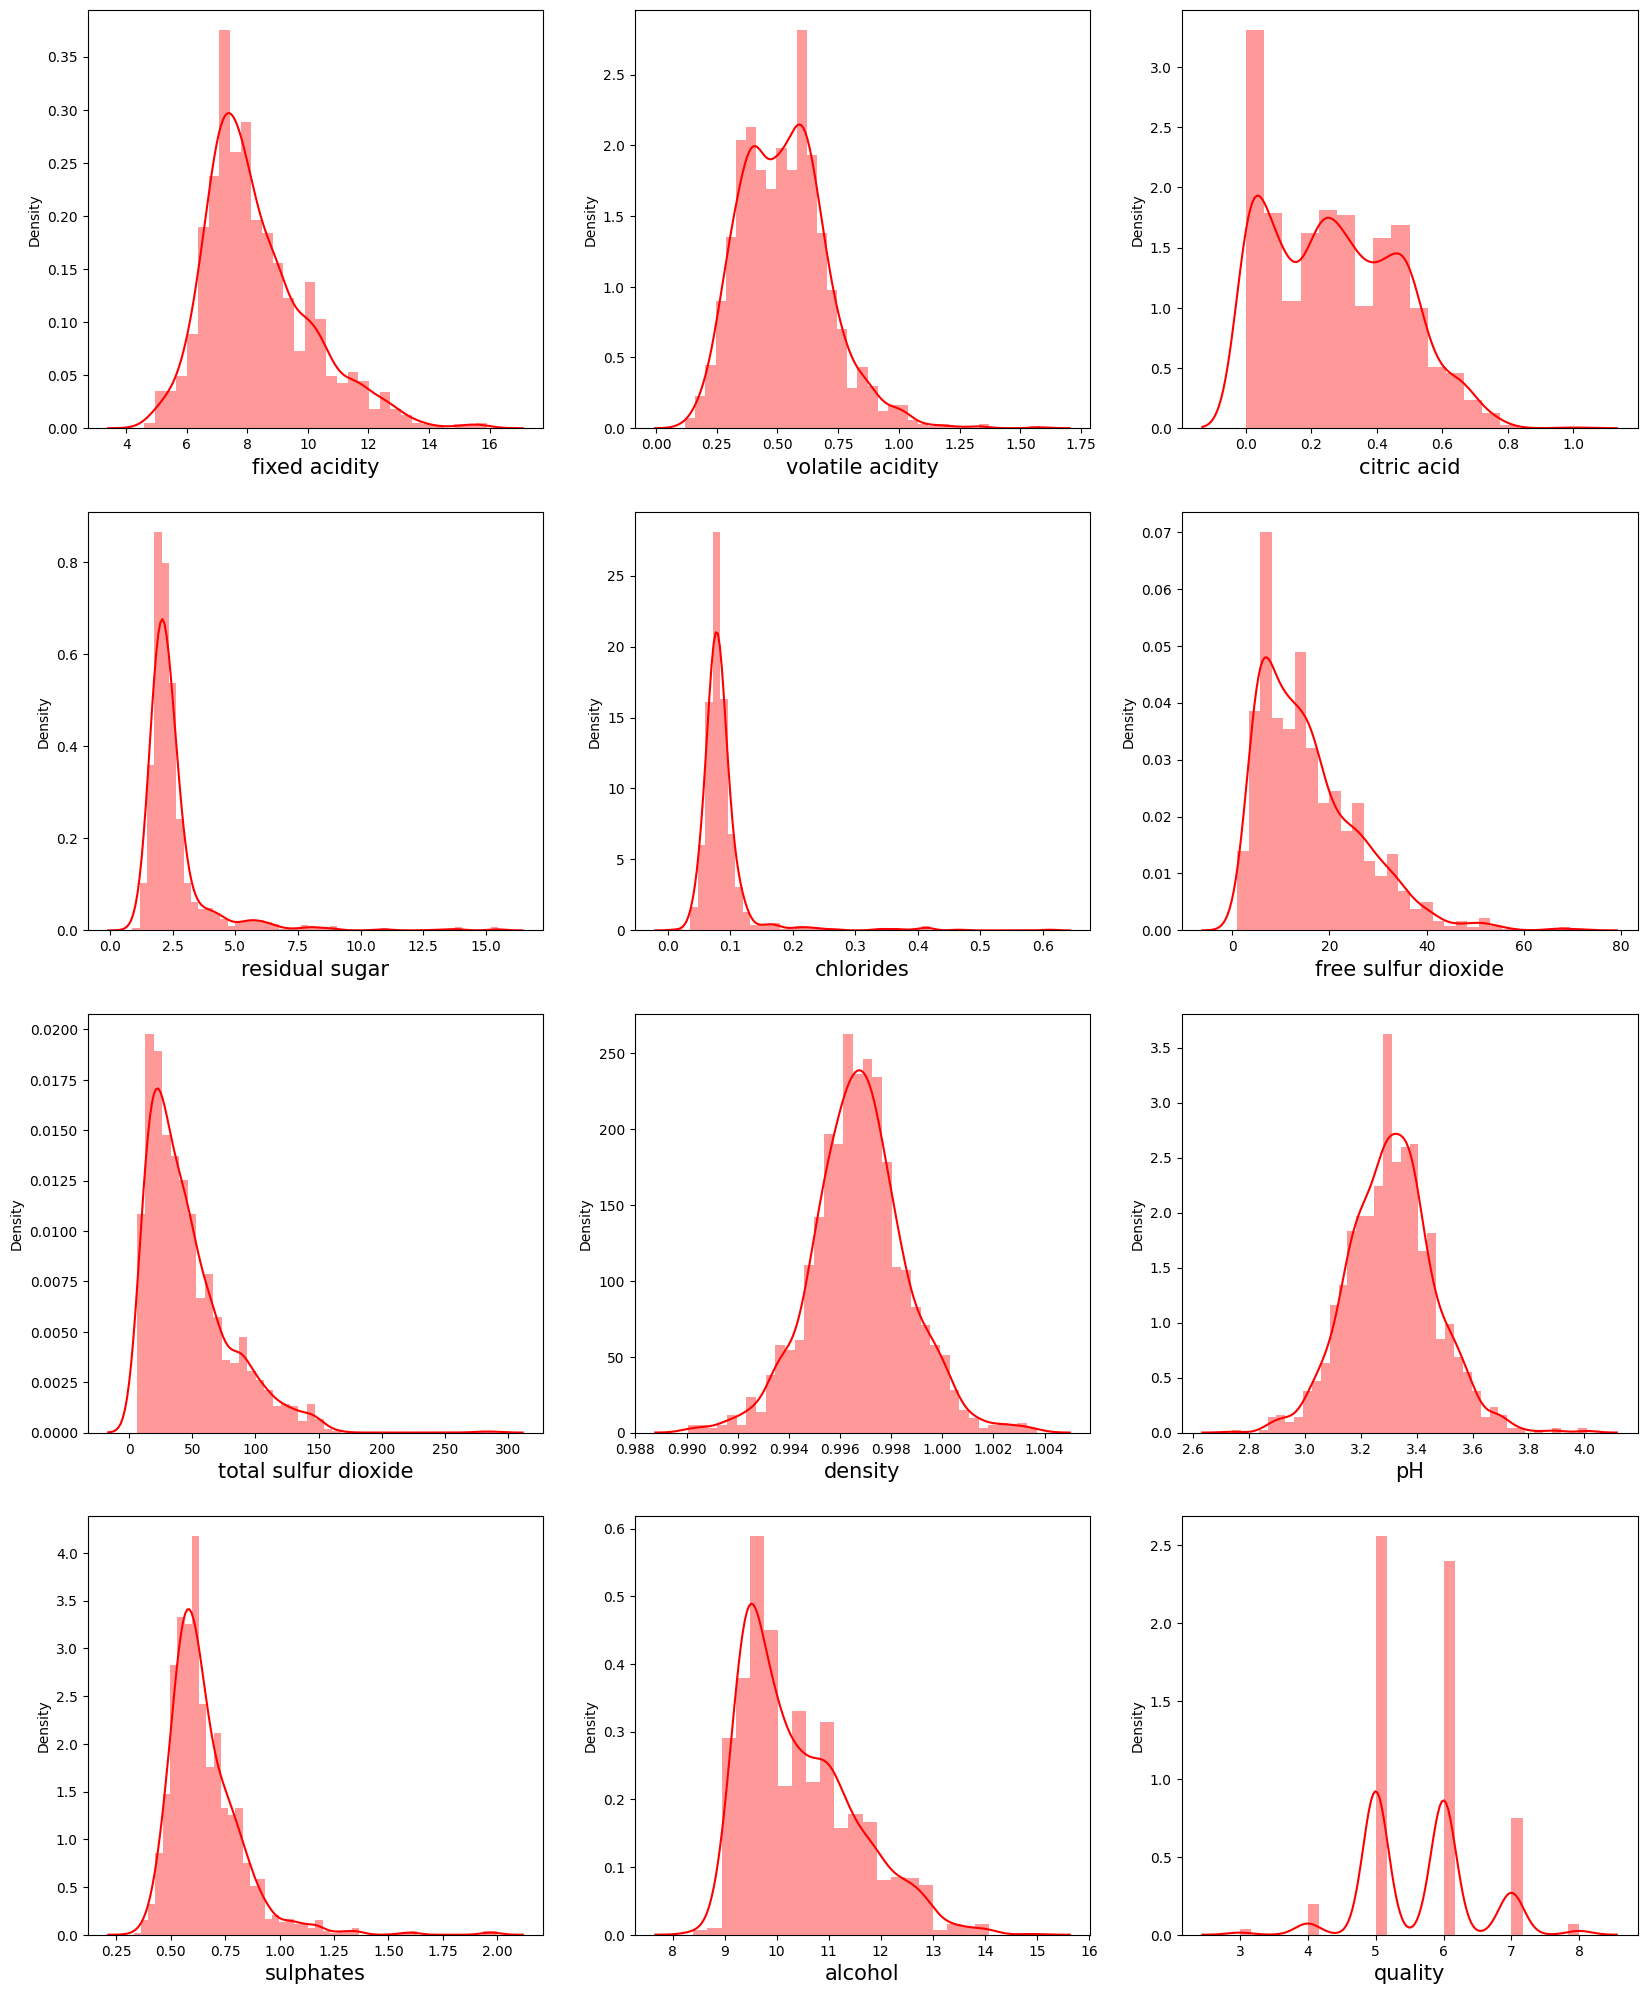

In [81]:
plt.figure(figsize=(20,25))
plotlable=1
for column in data:
    if plotlable<=12:
        plt.subplot(4,3,plotlable)
        sns.distplot(data[column], color='red')
        plt.xlabel(column,fontsize=15)
    plotlable+=1
plt.show()

#### OBSERVATIONS:

disbrubution: all columns are seems to be normally distrubuted

Skewness: all the columns except "density" and "pH" are skewed towards Right

Outliers: all columns except "density" and "pH" are having outliers

## Check for the skewness

In [82]:
for column in data:
    sk=data[column].skew()
    print (column, "   :   ",sk)


fixed acidity    :    0.9827514413284587
volatile acidity    :    0.6715925723840199
citric acid    :    0.3183372952546368
residual sugar    :    4.54065542590319
chlorides    :    5.680346571971722
free sulfur dioxide    :    1.250567293314441
total sulfur dioxide    :    1.515531257594554
density    :    0.07128766294927483
pH    :    0.19368349811284427
sulphates    :    2.4286723536602945
alcohol    :    0.8608288068888538
quality    :    0.21780157547366327


#### Observations: Skewness is on very higher side for the columns, and as the numbers are Positive so skewness is on Right side:

residual sugar    :    4.54065542590319
chlorides    :    5.680346571971722
sulphates    :    2.4286723536602945

### checking for multi-colinearity before working on skewness

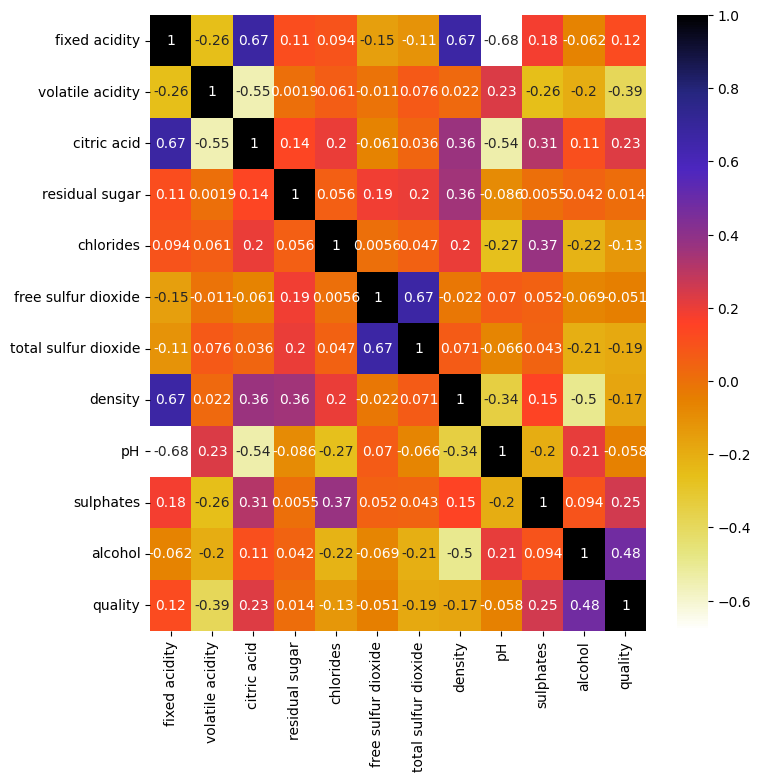

In [83]:
plt.figure(figsize=(8,8))
cor=data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

##### Observation: Plot show No major multi colinearity issue in data as none of the corr value is greater than 75%

## Working on Skewness

In [84]:
#starting with log method
temp=data[['residual sugar','chlorides','sulphates','free sulfur dioxide','total sulfur dioxide']]
log_temp=np.log(temp)
log_temp.skew()

residual sugar          1.806864
chlorides               1.745215
sulphates               0.921867
free sulfur dioxide    -0.234031
total sulfur dioxide   -0.079323
dtype: float64

In [85]:
# with sqrt method
sqrt_temp=np.sqrt(temp)
sqrt_temp.skew()

residual sugar          2.956763
chlorides               3.708789
sulphates               1.554542
free sulfur dioxide     0.483344
total sulfur dioxide    0.640439
dtype: float64

In [86]:
# with cbrt method
cbrt_temp=np.cbrt(temp)
cbrt_temp.skew()

residual sugar          2.532201
chlorides               3.059529
sulphates               1.322148
free sulfur dioxide     0.247358
total sulfur dioxide    0.393746
dtype: float64

#### log method is getting best results, so we stick to log method

In [87]:
log_temp=np.log(temp)
log_temp.skew()

residual sugar          1.806864
chlorides               1.745215
sulphates               0.921867
free sulfur dioxide    -0.234031
total sulfur dioxide   -0.079323
dtype: float64

In [88]:
data['residual sugar']=log_temp['residual sugar']
data['chlorides']=log_temp['chlorides']
data['sulphates']=log_temp['sulphates']
data['free sulfur dioxide']=log_temp['free sulfur dioxide']
data['total sulfur dioxide']=log_temp['total sulfur dioxide']

In [89]:
for column in data:
    sk=data[column].skew()
    print (column, "   :   ",sk)

fixed acidity    :    0.9827514413284587
volatile acidity    :    0.6715925723840199
citric acid    :    0.3183372952546368
residual sugar    :    1.8068638195807207
chlorides    :    1.7452154426856812
free sulfur dioxide    :    -0.23403124715031437
total sulfur dioxide    :    -0.07932282524494874
density    :    0.07128766294927483
pH    :    0.19368349811284427
sulphates    :    0.9218673620869906
alcohol    :    0.8608288068888538
quality    :    0.21780157547366327


#### better now

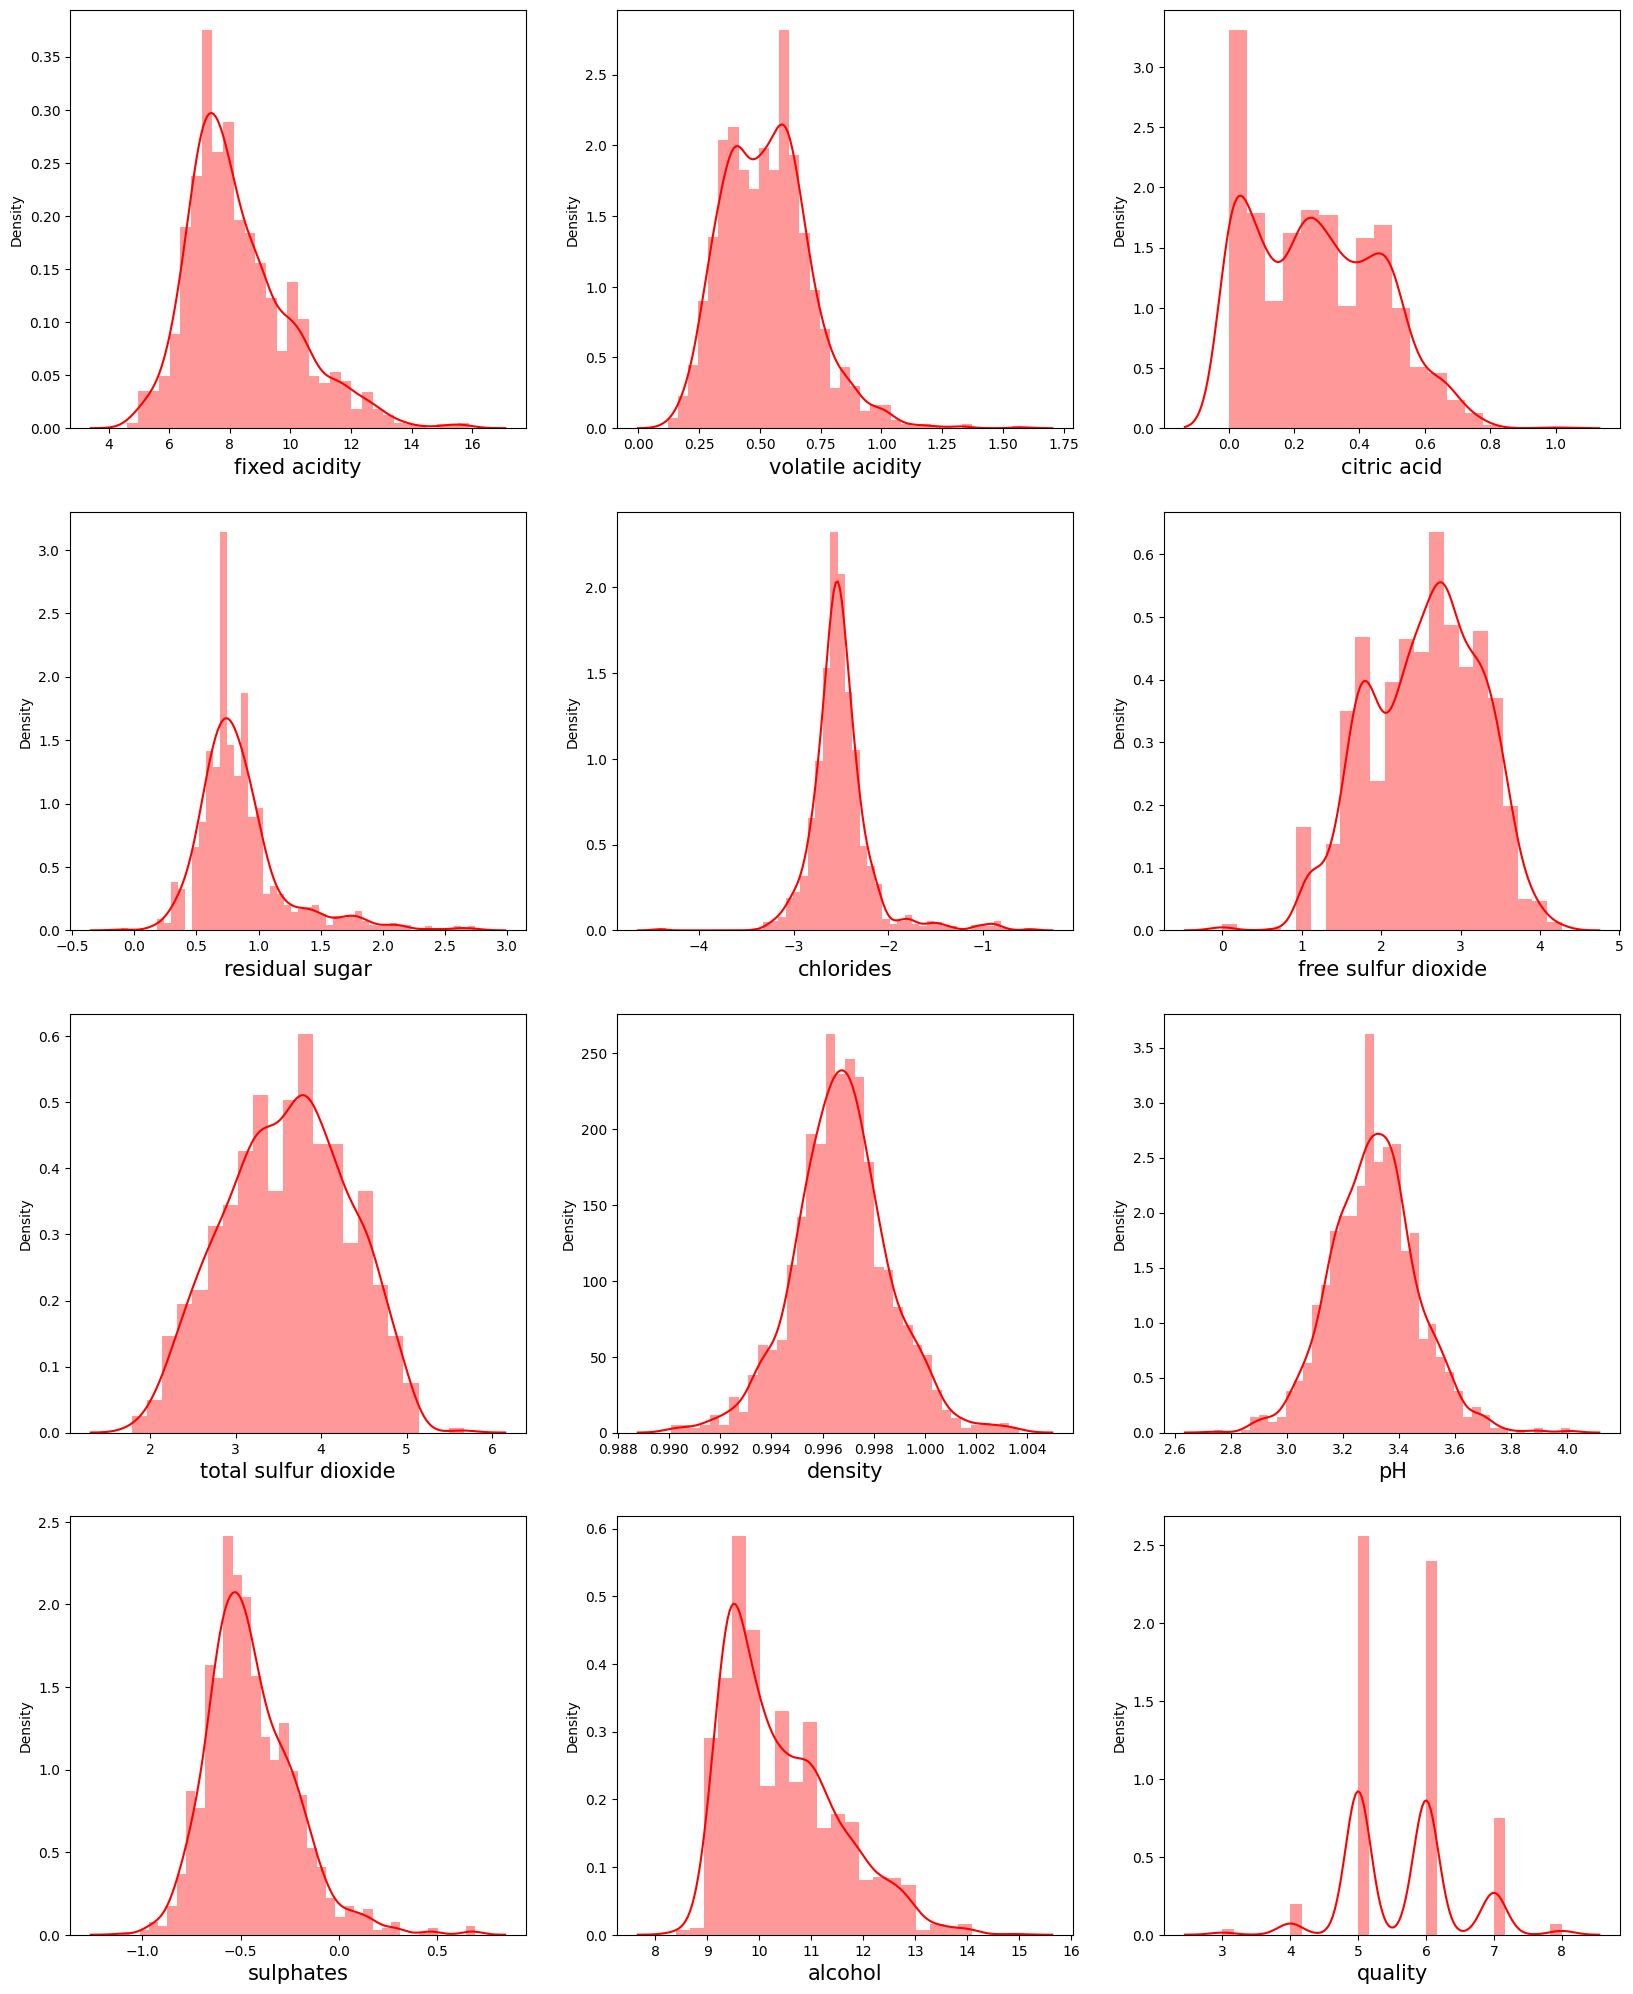

In [90]:
plt.figure(figsize=(20,25))
plotlable=1
for column in data:
    if plotlable<=12:
        plt.subplot(4,3,plotlable)
        sns.distplot(data[column], color='red')
        plt.xlabel(column,fontsize=15)
    plotlable+=1
plt.show()

#### better in shape now

In [91]:
#seperate features and Label
X=data.drop(columns='quality', axis=1)
y=data['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

### Addressing Class imbalance issue

In [92]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

#### the data is imbalance in target variables

### Oversampling method

In [93]:
#oversampling the data
!pip install imblearn


In [94]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(X,y)

In [95]:
y1.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

## Model building

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()

In [97]:
X_scaler=scaler.fit_transform(x1)
X_scaler

array([[-0.53726116,  0.43134275, -1.29442141, ...,  1.20051384,
        -0.58611903, -1.13491791],
       [-0.29513455,  1.12700069, -1.29442141, ..., -0.87206074,
         0.31110829, -0.79789275],
       [-0.29513455,  0.66322873, -1.096696  , ..., -0.47091728,
         0.10259924, -0.79789275],
       ...,
       [ 1.06795392, -1.01766806,  1.39937502, ..., -1.20634697,
         0.90300112,  0.50723558],
       [-0.65832447, -0.88468905,  0.27852455, ..., -0.67148901,
         1.52634942,  0.01641862],
       [ 0.51585679, -0.96371074,  1.20039564, ..., -0.7714082 ,
         1.27557033,  0.80297676]])

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [99]:
# Random Forest Classifier
rs=0
max_acc=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(X_scaler,y1,test_size=0.25,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    if accuracy > max_acc:
        max_acc=accuracy
        rs=i
print("Max accuracy score : ", max_acc, "   , at Random state : ", rs)


Max accuracy score :  0.8992172211350293    , at Random state :  177


##### Max acuracy is 90% at Random state - 177, so we will use Random State 177 for other models

#### Test Train Split

In [100]:
x_train,x_test,y_train,y_test=train_test_split(X_scaler,y1,test_size=0.25,random_state=rs)
y_test

2543    4
2139    3
449     6
2502    4
773     6
       ..
2480    4
8       7
1112    6
2171    3
1736    3
Name: quality, Length: 1022, dtype: int64

In [101]:
# Importing all other libraries for modeling
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score

### Random Forest Classifier

In [102]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rfc_y_pred=rf.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,rfc_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,rfc_y_pred))
print("\n classification_report  : \n", classification_report(y_test,rfc_y_pred))


accuracy_score : 0.9090019569471625

 confusion_matrix  : 
 [[190   0   0   0   0   0]
 [  0 163   1   5   0   0]
 [  1  10 148  18   0   0]
 [  3   5  27  96  10   3]
 [  0   1   3   6 150   0]
 [  0   0   0   0   0 182]]

 classification_report  : 
               precision    recall  f1-score   support

           3       0.98      1.00      0.99       190
           4       0.91      0.96      0.94       169
           5       0.83      0.84      0.83       177
           6       0.77      0.67      0.71       144
           7       0.94      0.94      0.94       160
           8       0.98      1.00      0.99       182

    accuracy                           0.91      1022
   macro avg       0.90      0.90      0.90      1022
weighted avg       0.91      0.91      0.91      1022



### Support Vector Classifier

In [103]:
svc=SVC()
svc.fit(x_train, y_train)
svc_y_pred=svc.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,svc_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,svc_y_pred))
print("\n classification_report  : \n", classification_report(y_test,svc_y_pred))

accuracy_score : 0.7896281800391389

 confusion_matrix  : 
 [[190   0   0   0   0   0]
 [  9 142  15   3   0   0]
 [ 10  30  99  33   3   2]
 [  2  11  33  72  20   6]
 [  1   6   4  17 122  10]
 [  0   0   0   0   0 182]]

 classification_report  : 
               precision    recall  f1-score   support

           3       0.90      1.00      0.95       190
           4       0.75      0.84      0.79       169
           5       0.66      0.56      0.60       177
           6       0.58      0.50      0.54       144
           7       0.84      0.76      0.80       160
           8       0.91      1.00      0.95       182

    accuracy                           0.79      1022
   macro avg       0.77      0.78      0.77      1022
weighted avg       0.78      0.79      0.78      1022



### Gradient Boosting Classifier

In [104]:
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)
gb_y_pred=gb.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,gb_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,gb_y_pred))
print("\n classification_report  : \n", classification_report(y_test,gb_y_pred))

accuracy_score : 0.8405088062622309

 confusion_matrix  : 
 [[188   2   0   0   0   0]
 [  0 155   7   6   1   0]
 [  3  19 113  37   5   0]
 [  2   6  23  88  20   5]
 [  1   2   4  16 134   3]
 [  0   0   0   0   1 181]]

 classification_report  : 
               precision    recall  f1-score   support

           3       0.97      0.99      0.98       190
           4       0.84      0.92      0.88       169
           5       0.77      0.64      0.70       177
           6       0.60      0.61      0.60       144
           7       0.83      0.84      0.83       160
           8       0.96      0.99      0.98       182

    accuracy                           0.84      1022
   macro avg       0.83      0.83      0.83      1022
weighted avg       0.84      0.84      0.84      1022



### AdaBoost Classifier

In [105]:
ab=AdaBoostClassifier()
ab.fit(x_train, y_train)
ab_y_pred=ab.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,ab_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,ab_y_pred))
print("\n classification_report  : \n", classification_report(y_test,ab_y_pred))

accuracy_score : 0.41487279843444225

 confusion_matrix  : 
 [[176   0   0  14   0   0]
 [117   0   5  44   1   2]
 [109   0  12  49   6   1]
 [ 42   0  14  48  19  21]
 [ 13   0   3  24  32  88]
 [  0   0   0   0  26 156]]

 classification_report  : 
               precision    recall  f1-score   support

           3       0.39      0.93      0.54       190
           4       0.00      0.00      0.00       169
           5       0.35      0.07      0.11       177
           6       0.27      0.33      0.30       144
           7       0.38      0.20      0.26       160
           8       0.58      0.86      0.69       182

    accuracy                           0.41      1022
   macro avg       0.33      0.40      0.32      1022
weighted avg       0.33      0.41      0.33      1022



### Bagging Classifier

In [106]:
bag=BaggingClassifier()
bag.fit(x_train,y_train)
bag_y_pred=bag.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,bag_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,bag_y_pred))
print("\n classification_report  : \n", classification_report(y_test,bag_y_pred))

accuracy_score : 0.8551859099804305

 confusion_matrix  : 
 [[189   1   0   0   0   0]
 [  4 157   5   3   0   0]
 [  4  18 120  33   2   0]
 [  1   5  41  83  12   2]
 [  0   0   4  12 143   1]
 [  0   0   0   0   0 182]]

 classification_report  : 
               precision    recall  f1-score   support

           3       0.95      0.99      0.97       190
           4       0.87      0.93      0.90       169
           5       0.71      0.68      0.69       177
           6       0.63      0.58      0.60       144
           7       0.91      0.89      0.90       160
           8       0.98      1.00      0.99       182

    accuracy                           0.86      1022
   macro avg       0.84      0.85      0.84      1022
weighted avg       0.85      0.86      0.85      1022



### Extra Trees Classifier

In [107]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
et_y_pred=et.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,et_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,et_y_pred))
print("\n classification_report  : \n", classification_report(y_test,et_y_pred))


accuracy_score : 0.9050880626223092

 confusion_matrix  : 
 [[190   0   0   0   0   0]
 [  0 163   3   3   0   0]
 [  3   9 137  25   3   0]
 [  0   6  27  98  12   1]
 [  0   1   2   2 155   0]
 [  0   0   0   0   0 182]]

 classification_report  : 
               precision    recall  f1-score   support

           3       0.98      1.00      0.99       190
           4       0.91      0.96      0.94       169
           5       0.81      0.77      0.79       177
           6       0.77      0.68      0.72       144
           7       0.91      0.97      0.94       160
           8       0.99      1.00      1.00       182

    accuracy                           0.91      1022
   macro avg       0.90      0.90      0.90      1022
weighted avg       0.90      0.91      0.90      1022



### So, the accuracy scores are:
###### Random Forest Classifier - 89.8%
###### support vector Classifier - 77.2%
###### Gradient Boosting Classifier - 84.6%
###### AdaBoost Classifier - 32.6%
###### Bagging Classifier - 86.0%
###### Extra Trees Classifier - 90.6%


#### So the best of them are Extra Tree Classifier with 90.6% accuracy

### Cross validation score

In [108]:
from sklearn.model_selection import cross_val_score

In [109]:
#Cross validation for Random forest classifier
cv_score = cross_val_score(rf,X_scaler,y1,cv=7,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score Random forest classifier : ', (accuracy_score(y_test,rfc_y_pred)-cv_score.mean()))

[0.82534247 0.82020548 0.82191781 0.81335616 0.80821918 0.83876501
 0.85763293]
0.8264912910816246
difference in score Random forest classifier :  0.0825106658655379


In [110]:
#Cross validation for support vector classifier
cv_score = cross_val_score(svc,X_scaler,y1,cv=7,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score support vector classifier : ', (accuracy_score(y_test,svc_y_pred)-cv_score.mean()))

[0.75684932 0.74315068 0.75       0.73458904 0.74315068 0.81646655
 0.75643225]
0.757234075048756
difference in score support vector classifier :  0.03239410499038298


In [111]:
#Cross validation for Gradient Boosting classifier
cv_score = cross_val_score(gb,X_scaler,y1,cv=7,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score Gradient Boosting classifier :  ', (accuracy_score(y_test,gb_y_pred)-cv_score.mean()))

[0.7619863  0.76541096 0.76883562 0.79623288 0.77568493 0.81989708
 0.7890223 ]
0.7824385810622564
difference in score Gradient Boosting classifier :   0.05807022519997451


In [112]:
#Cross validation for AdaBoost classifier
cv_score = cross_val_score(ab,X_scaler,y1,cv=7,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score AdaBoost classifier : ', (accuracy_score(y_test,ab_y_pred)-cv_score.mean()))

[0.38356164 0.39726027 0.40924658 0.43321918 0.40068493 0.42024014
 0.31046312]
0.3935251231064103
difference in score AdaBoost classifier :  0.021347675328031945


In [113]:
#Cross validation for Bagging classifier
cv_score = cross_val_score(bag,X_scaler,y1,cv=7,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score Bagging classifier : ', (accuracy_score(y_test,bag_y_pred)-cv_score.mean()))

[0.7739726  0.76883562 0.78253425 0.78938356 0.79109589 0.81475129
 0.81475129]
0.7907606415295741
difference in score Bagging classifier :  0.06442526845085639


In [114]:
#Cross validation for Extratree classifier
cv_score = cross_val_score(et,X_scaler,y1,cv=7,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score Extratree classifier : ', (accuracy_score(y_test,et_y_pred)-cv_score.mean()))

[0.83732877 0.82363014 0.80650685 0.83390411 0.83219178 0.85077187
 0.86620926]
0.8357918251301554
difference in score Extratree classifier :  0.06929623749215386


#### # Since Extra Tree classifier is having highest accuracy score and while doing cross validation the difference in accuracy score and cross validation score is 0.06 so we are proceeding with Extra Tree classifier

### Hyper Parameter Tuning

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
params={'criterion' : ['entropy','gini'],
       'random_state' : [10,75,112],
       'max_depth' : [None,7,15,23,37],
       'min_samples_split': [2,4,8],
       'n_jobs' : [-2,-1,1],
       'n_estimators' : [100,150,200,50]}


In [ ]:
gscv=GridSearchCV(et,params,cv=7)
gscv.fit(x_train,y_train)

In [121]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_split': 2,
 'n_estimators': 150,
 'n_jobs': -2,
 'random_state': 112}

In [122]:
gscv.best_score_

0.8681426615974123

In [123]:
best_model=ExtraTreesClassifier(criterion = 'gini', max_depth= None, n_estimators= 150,min_samples_split= 2, n_jobs= -2,random_state= 112)
best_model.fit(x_train,y_train)
y_pred=best_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print('accuracy of the model is :  ', accuracy*100,"%" )

accuracy of the model is :   90.99804305283757 %


### Saving model

In [125]:
import pickle
pickle.dump(best_model,open('best_model_extra_trees','wb'))

In [126]:
model=pickle.load(open('best_model_extra_trees','rb'))

In [127]:
prediction = model.predict(x_test)
prediction

array([4, 3, 6, ..., 7, 3, 3])

In [128]:
df=pd.DataFrame()
arr=np.array(y_test)
df['original']=arr
df['predicted']=prediction
df

,original,predicted
0,4,4
1,3,3
2,6,6
3,4,4
4,6,6
...,...,...
1017,4,4
1018,7,7
1019,6,7
1020,3,3
